## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
monitor=[['val_accuracy'],['val_loss']]
patience=[10,25]

## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
並將 monitor 設定為監控 Validation Accuracy
"""

from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=10, 
                          verbose=1
                          )

In [12]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
for i, (monitor, patience) in enumerate(itertools.product(monitor, patience)):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Numbers of exp: %i,monitor = %s, patience = %s" % (i, monitor, patience))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Numbers of exp: 0,monitor = ['val_accuracy'], patience = 10
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________

50000/50000 [==============================] - 42s 846us/step - loss: 0.8318 - accuracy: 0.7044 - val_loss: 1.6338 - val_accuracy: 0.4908
Epoch 46/50
50000/50000 [==============================] - 44s 878us/step - loss: 0.8279 - accuracy: 0.7022 - val_loss: 1.6319 - val_accuracy: 0.4925
Epoch 47/50
50000/50000 [==============================] - 41s 822us/step - loss: 0.8155 - accuracy: 0.7081 - val_loss: 1.5546 - val_accuracy: 0.5099
Epoch 48/50
50000/50000 [==============================] - 38s 755us/step - loss: 0.8174 - accuracy: 0.7055 - val_loss: 1.6676 - val_accuracy: 0.4941
Epoch 49/50
50000/50000 [==============================] - 40s 791us/step - loss: 0.8040 - accuracy: 0.7099 - val_loss: 1.5796 - val_accuracy: 0.5100
Epoch 50/50
50000/50000 [==============================] - 41s 820us/step - loss: 0.7969 - accuracy: 0.7161 - val_loss: 1.6519 - val_accuracy: 0.4927
Numbers of exp: 1,monitor = ['val_accuracy'], patience = 25
Model: "model_1"
___________________________________

50000/50000 [==============================] - 38s 750us/step - loss: 0.8724 - accuracy: 0.6889 - val_loss: 1.6065 - val_accuracy: 0.4832
Epoch 40/50
50000/50000 [==============================] - 37s 746us/step - loss: 0.8694 - accuracy: 0.6895 - val_loss: 1.5105 - val_accuracy: 0.5108
Epoch 41/50
50000/50000 [==============================] - 37s 746us/step - loss: 0.8570 - accuracy: 0.6939 - val_loss: 1.5076 - val_accuracy: 0.5210
Epoch 42/50
50000/50000 [==============================] - 38s 752us/step - loss: 0.8614 - accuracy: 0.6932 - val_loss: 1.6119 - val_accuracy: 0.4897
Epoch 43/50
50000/50000 [==============================] - 37s 750us/step - loss: 0.8512 - accuracy: 0.6972 - val_loss: 1.4821 - val_accuracy: 0.5132
Epoch 44/50
50000/50000 [==============================] - 37s 745us/step - loss: 0.8424 - accuracy: 0.6989 - val_loss: 1.5409 - val_accuracy: 0.5060
Epoch 45/50
50000/50000 [==============================] - 37s 746us/step - loss: 0.8291 - accuracy: 0.7047 - va

50000/50000 [==============================] - 37s 746us/step - loss: 0.9285 - accuracy: 0.6695 - val_loss: 1.6869 - val_accuracy: 0.4650
Epoch 34/50
50000/50000 [==============================] - 38s 755us/step - loss: 0.9186 - accuracy: 0.6732 - val_loss: 1.5265 - val_accuracy: 0.5009
Epoch 35/50
50000/50000 [==============================] - 37s 746us/step - loss: 0.9017 - accuracy: 0.6772 - val_loss: 1.4389 - val_accuracy: 0.5123
Epoch 36/50
50000/50000 [==============================] - 37s 745us/step - loss: 0.8897 - accuracy: 0.6859 - val_loss: 1.4684 - val_accuracy: 0.5122
Epoch 37/50
50000/50000 [==============================] - 37s 749us/step - loss: 0.8822 - accuracy: 0.6866 - val_loss: 1.5887 - val_accuracy: 0.4909
Epoch 38/50
50000/50000 [==============================] - 38s 751us/step - loss: 0.8740 - accuracy: 0.6891 - val_loss: 1.5099 - val_accuracy: 0.5134
Epoch 39/50
50000/50000 [==============================] - 37s 744us/step - loss: 0.8628 - accuracy: 0.6923 - va

50000/50000 [==============================] - 38s 752us/step - loss: 0.9706 - accuracy: 0.6553 - val_loss: 1.4591 - val_accuracy: 0.5056
Epoch 28/50
50000/50000 [==============================] - 38s 754us/step - loss: 0.9705 - accuracy: 0.6528 - val_loss: 1.5246 - val_accuracy: 0.4927
Epoch 29/50
50000/50000 [==============================] - 38s 754us/step - loss: 0.9691 - accuracy: 0.6548 - val_loss: 1.4686 - val_accuracy: 0.5112
Epoch 30/50
50000/50000 [==============================] - 37s 749us/step - loss: 0.9534 - accuracy: 0.6628 - val_loss: 1.4391 - val_accuracy: 0.5141
Epoch 31/50
50000/50000 [==============================] - 37s 749us/step - loss: 0.9320 - accuracy: 0.6691 - val_loss: 1.4835 - val_accuracy: 0.5108
Epoch 32/50
50000/50000 [==============================] - 38s 755us/step - loss: 0.9338 - accuracy: 0.6686 - val_loss: 1.4741 - val_accuracy: 0.5072
Epoch 33/50
50000/50000 [==============================] - 37s 747us/step - loss: 0.9196 - accuracy: 0.6723 - va

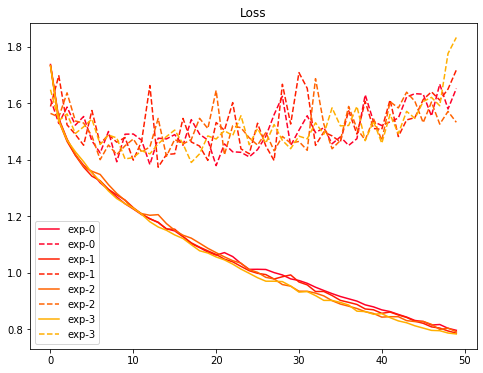

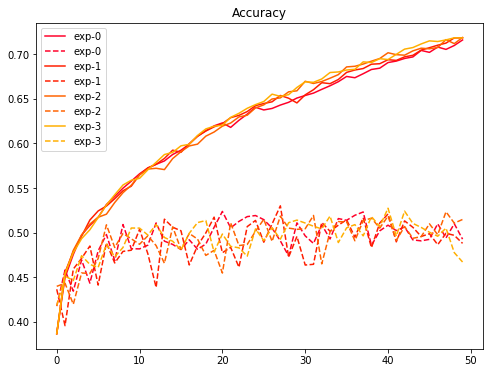

In [13]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()